In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

Read and format data

In [2]:
df = pd.read_csv("testdata.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,2000-01-01 00:03:53.650,37.41667,-121.76650,5.360,1.23,Md,21,78,5,0.04,NCSN,21075021
1,2000-01-01 00:09:21.180,37.63683,-119.04967,0.098,0.95,Md,9,104,3,0.06,NCSN,21075023
2,2000-01-01 02:30:44.070,37.56633,-118.82633,2.423,1.25,Md,14,163,3,0.01,NCSN,30503920
3,2000-01-01 05:19:24.020,36.03900,-120.57733,8.695,1.19,Md,13,169,4,0.01,NCSN,21075061
4,2000-01-01 06:05:57.080,35.98967,-120.54884,4.143,1.14,Md,15,133,5,0.03,NCSN,21075067


Filtering data for magnitude >= 5

In [3]:
filtered_df = df.copy()
filtered_df = filtered_df[filtered_df['Magnitude'] >= 5]
filtered_df.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
2380,2000-03-16 15:19:56.380,40.38867,-125.23850,4.803,5.7,Mw,139,228,77,0.29,NCSN,21086915
13604,2001-01-13 13:08:42.100,40.75566,-125.24450,2.243,5.4,Mw,155,233,83,0.26,NCSN,21143281
20427,2001-07-17 12:07:25.830,36.01266,-117.86633,7.158,5.2,Mw,15,177,19,0.06,NCSN,21181820
21603,2001-08-10 20:19:27.060,39.81116,-120.61667,5.011,5.2,Mw,76,111,35,0.34,NCSN,21188442
33074,2002-06-17 16:55:07.680,40.80983,-124.55200,17.195,5.2,Mw,63,225,41,0.16,NCSN,21231051


In [4]:
aftershock_data = filtered_df.copy()
for i in range(0,30):
    aftershock_data['day'+str(i)] = pd.Series([None] * len(aftershock_data))
aftershock_data['overallAftershocks'] = pd.Series([None] * len(aftershock_data))
aftershock_data.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,...,day21,day22,day23,day24,day25,day26,day27,day28,day29,overallAftershocks
2380,2000-03-16 15:19:56.380,40.38867,-125.23850,4.803,5.7,Mw,139,228,77,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13604,2001-01-13 13:08:42.100,40.75566,-125.24450,2.243,5.4,Mw,155,233,83,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20427,2001-07-17 12:07:25.830,36.01266,-117.86633,7.158,5.2,Mw,15,177,19,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21603,2001-08-10 20:19:27.060,39.81116,-120.61667,5.011,5.2,Mw,76,111,35,0.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33074,2002-06-17 16:55:07.680,40.80983,-124.55200,17.195,5.2,Mw,63,225,41,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Count aftershocks after every bigger eartquake and add them as a new column

In [5]:
for event_id in filtered_df['EventID'].unique():
    event_data = filtered_df[filtered_df['EventID'] == event_id]
    
    earthquake_datetime = event_data['DateTime'].iloc[0]

    # Iterate through days after the earthquake and count aftershocks
    aftershock_counts = []
    overall_count = 0
    for i in range(0, 30):
      day = earthquake_datetime + pd.Timedelta(days=i)
      day_after = day + pd.Timedelta(days=1)
      aftershocks_after_day = df[(df['DateTime'] > day)]
      aftershocks_on_day = aftershocks_after_day[(aftershocks_after_day['DateTime'] < day_after)]
      aftershock_count = len(aftershocks_on_day)
      overall_count += aftershock_count
      daystring = "day"+str(i)
      aftershock_data.loc[aftershock_data["EventID"]== event_id,daystring] = aftershock_count
    aftershock_data.loc[aftershock_data["EventID"]== event_id,"overallAftershocks"] = overall_count

In [6]:
aftershock_data.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,...,day21,day22,day23,day24,day25,day26,day27,day28,day29,overallAftershocks
2380,2000-03-16 15:19:56.380,40.38867,-125.23850,4.803,5.7,Mw,139,228,77,0.29,...,37,36,46,43,32,32,37,37,49,965
13604,2001-01-13 13:08:42.100,40.75566,-125.24450,2.243,5.4,Mw,155,233,83,0.26,...,35,31,43,39,42,44,34,30,38,1043
20427,2001-07-17 12:07:25.830,36.01266,-117.86633,7.158,5.2,Mw,15,177,19,0.06,...,43,37,33,62,39,71,37,51,35,1454
21603,2001-08-10 20:19:27.060,39.81116,-120.61667,5.011,5.2,Mw,76,111,35,0.34,...,33,40,37,32,36,29,29,34,40,1099
33074,2002-06-17 16:55:07.680,40.80983,-124.55200,17.195,5.2,Mw,63,225,41,0.16,...,49,52,40,41,60,40,30,50,42,1243


In [7]:
aftershock_data.to_csv("result.csv")

Visualize aftershocks count

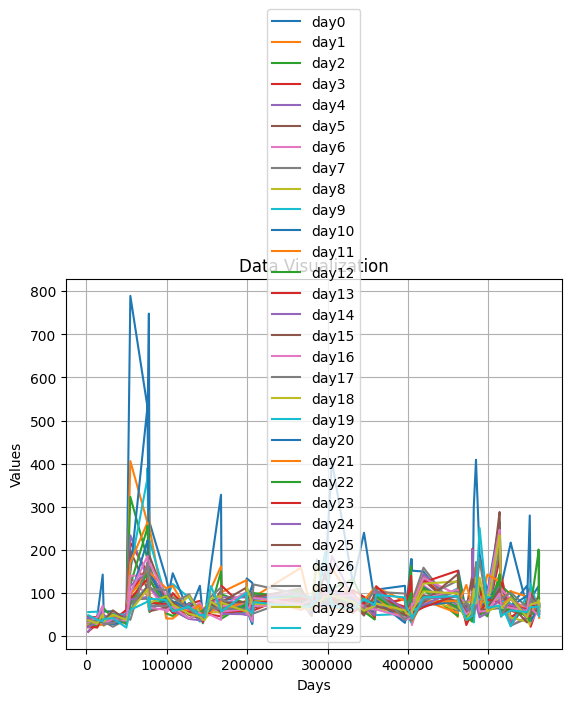

In [8]:
plt.figure()

daylist = []
for i in range(0,30):
    daylist.append("day"+str(i))

for column in daylist:
    plt.plot(aftershock_data[column], label=column)

plt.xlabel('Days')
plt.ylabel('Values')
plt.title('Data Visualization')
#plt.xticks(range(len(aftershock_data)), daylist)  # x-Achsenbeschriftung auf den Index des DataFrame setzen
plt.legend()
plt.grid(True)
plt.show()

Visualize mean of the aftershock count

<Axes: >

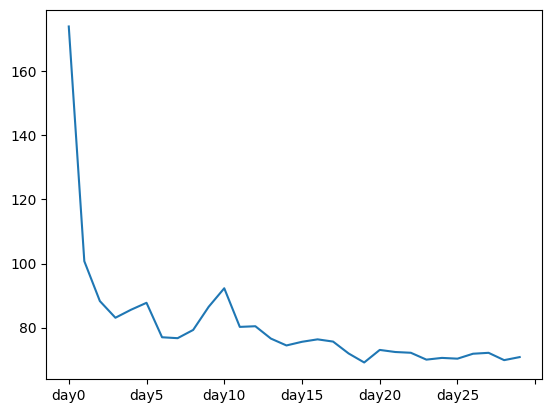

In [9]:
df_durchschnitt = aftershock_data[daylist].mean()
df_durchschnitt.plot()
#print(df_durchschnitt)

<Axes: xlabel='Magnitude', ylabel='day0'>

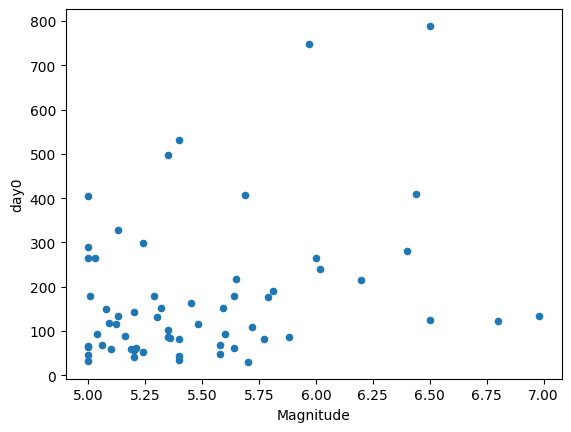

In [10]:
aftershock_data.plot(x="Magnitude",y="day0",kind="scatter")

Visualize location of Earthquakes

In [18]:
m = folium.Map(location=[aftershock_data['Latitude'].mean(), aftershock_data['Longitude'].mean()], zoom_start=6, zoom_control=False, scrollWheelZoom=False, dragging=True)
for i in range(len(aftershock_data)):
    row = aftershock_data.iloc[i]
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Magnitude']).add_to(m)
m